# Importing libreries required for analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [4]:
df=pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above observations we can see
 1)Age , embarked and cabin has NAN values
 2)columns like Name, Ticket, and cabin are not required and can be droped
 3)NAN values of age and embarked colums should be replaced
 4) string values of sex and embarked should be replaced with numbers

In [8]:
df1=df.drop(labels=["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

most of the values in embarked column is belongs to "S" we will replace NaN values with s
and will replace Nan values from age colum with median value

In [11]:
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna("S", inplace=True)

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#now we can see their are no NAN values , now we convert embarked and sex value to numbers

In [14]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"] =le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])

In [15]:
print(df["Embarked"].value_counts())
print(df["Sex"].value_counts())
print(df.head())

2    646
0    168
1     77
Name: Embarked, dtype: int64
1    577
0    314
Name: Sex, dtype: int64
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


all the values of sex and embarked are converted into numbers

# EDA

 Analysis of the sex with respect to survival rate( male=1, female=0)

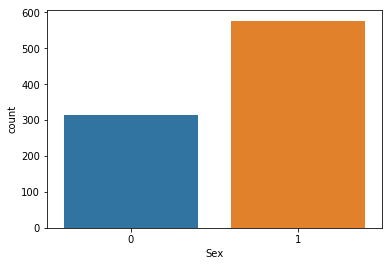

In [16]:
sns.countplot(df["Sex"])

total female survived: 233
total male survived: 109
total survived: 342


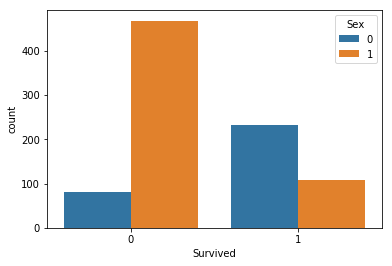

In [17]:
sns.countplot(df["Survived"],hue=df["Sex"])
total_survived_females = df[df.Sex == 0]["Survived"].sum()
total_survived_males = df[df.Sex == 1]["Survived"].sum()
print("total female survived:",total_survived_females)
print("total male survived:",total_survived_males)
print("total survived:",total_survived_males+total_survived_females)

From the above grapgh we can see that propotion of the female survived is more then that of male

Analysis of the Pclass with respect to survival rate

total_survived class one = 136
total_survived class two = 87
total_survived class three =  119
total_survived class = 342


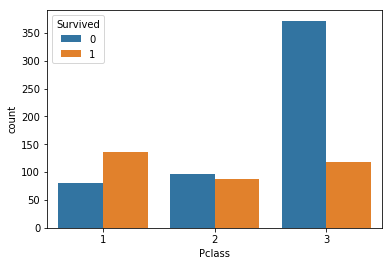

In [18]:
sns.countplot(df["Pclass"], hue=df["Survived"])

print("total_survived class one =", df[df.Pclass == 1]["Survived"].sum())
print("total_survived class two =",df[df.Pclass == 2]["Survived"].sum())
print("total_survived class three = ",df[df.Pclass == 3]["Survived"].sum())
print("total_survived class =",  df[df.Pclass == 1]["Survived"].sum()+df[df.Pclass == 2]["Survived"].sum()+df[df.Pclass == 3]["Survived"].sum())

From the above grapgh we can see that survival rate in class one people is higest and class three is lowest

 Analysis of age

Text(0, 0.5, 'Not survived')

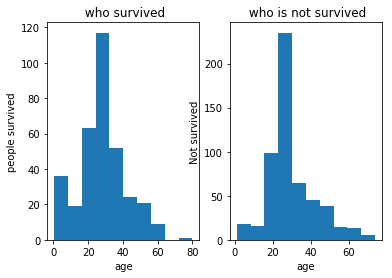

In [19]:
plt.subplot(1, 2, 1)
plt.hist(df[df.Survived == 1]["Age"])
plt.title(" who survived")
plt.xlabel("age")
plt.ylabel("people survived")
plt.subplot(1, 2, 2)
plt.hist(df[df.Survived == 0]["Age"])
plt.title(" who is not survived")
plt.xlabel("age")
plt.ylabel("Not survived")

By comparing the two grapgh we can conclude that most of the people who survived are younger age and who is not survived are belongs old age

lets compare all the independent variables using a pair plot

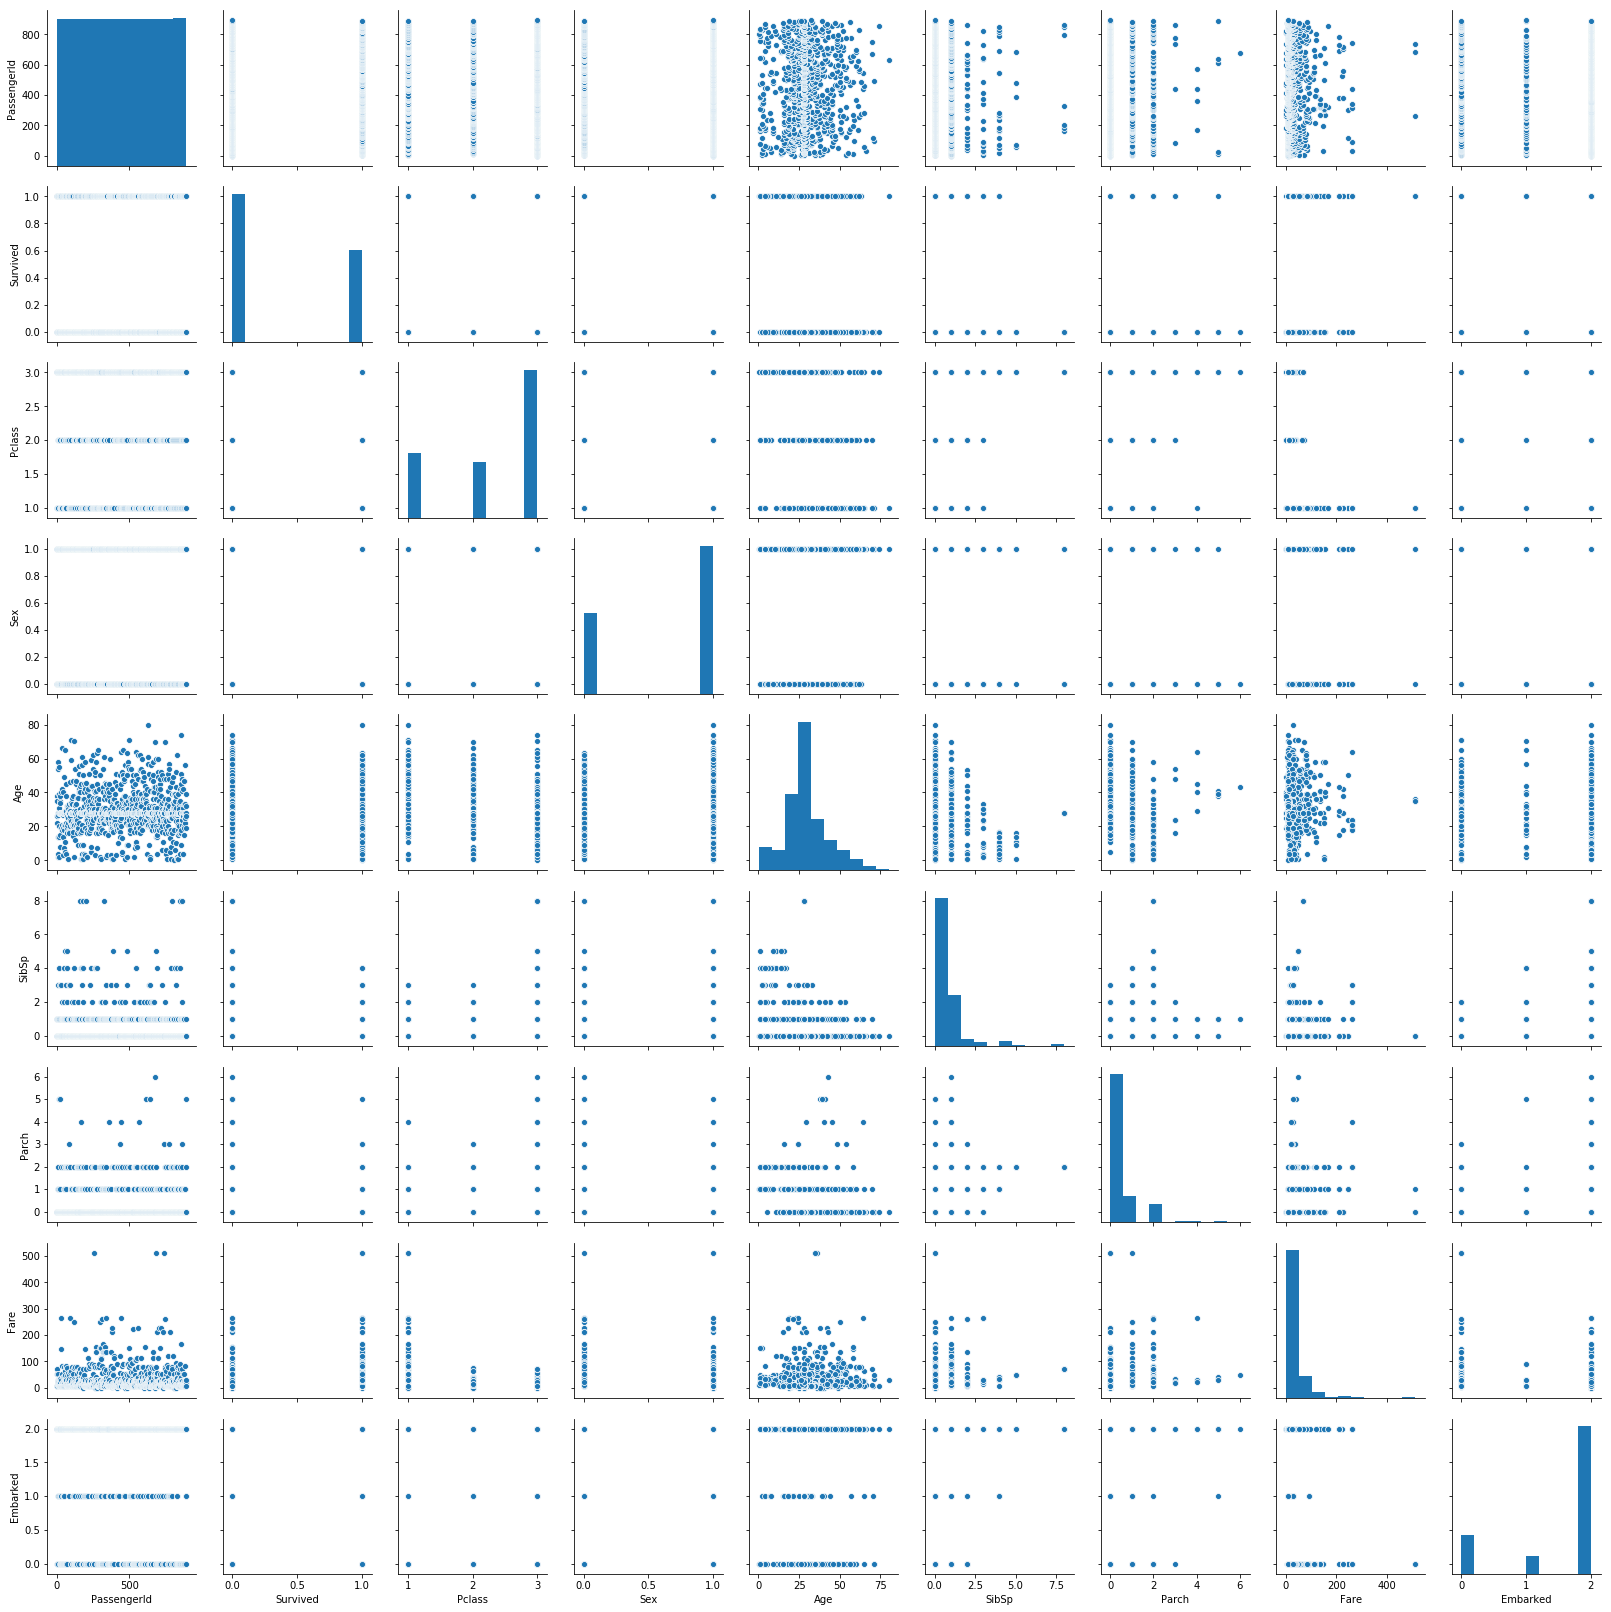

In [20]:
sns.pairplot(df)

# Data cleaning

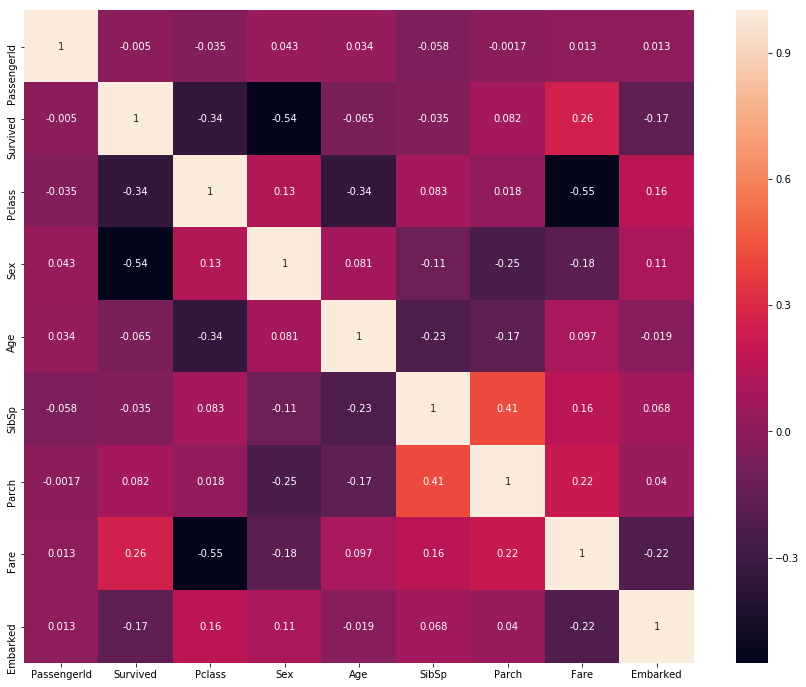

In [21]:
#check the correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

from the above heat map their is no corelation between PassengerID and survived so we can drop that column

In [22]:
df.drop(labels=["PassengerId"], axis=1, inplace=True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Cheking the skewness and removing the outliers 

In [24]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B16F358>,
      dtype=object)

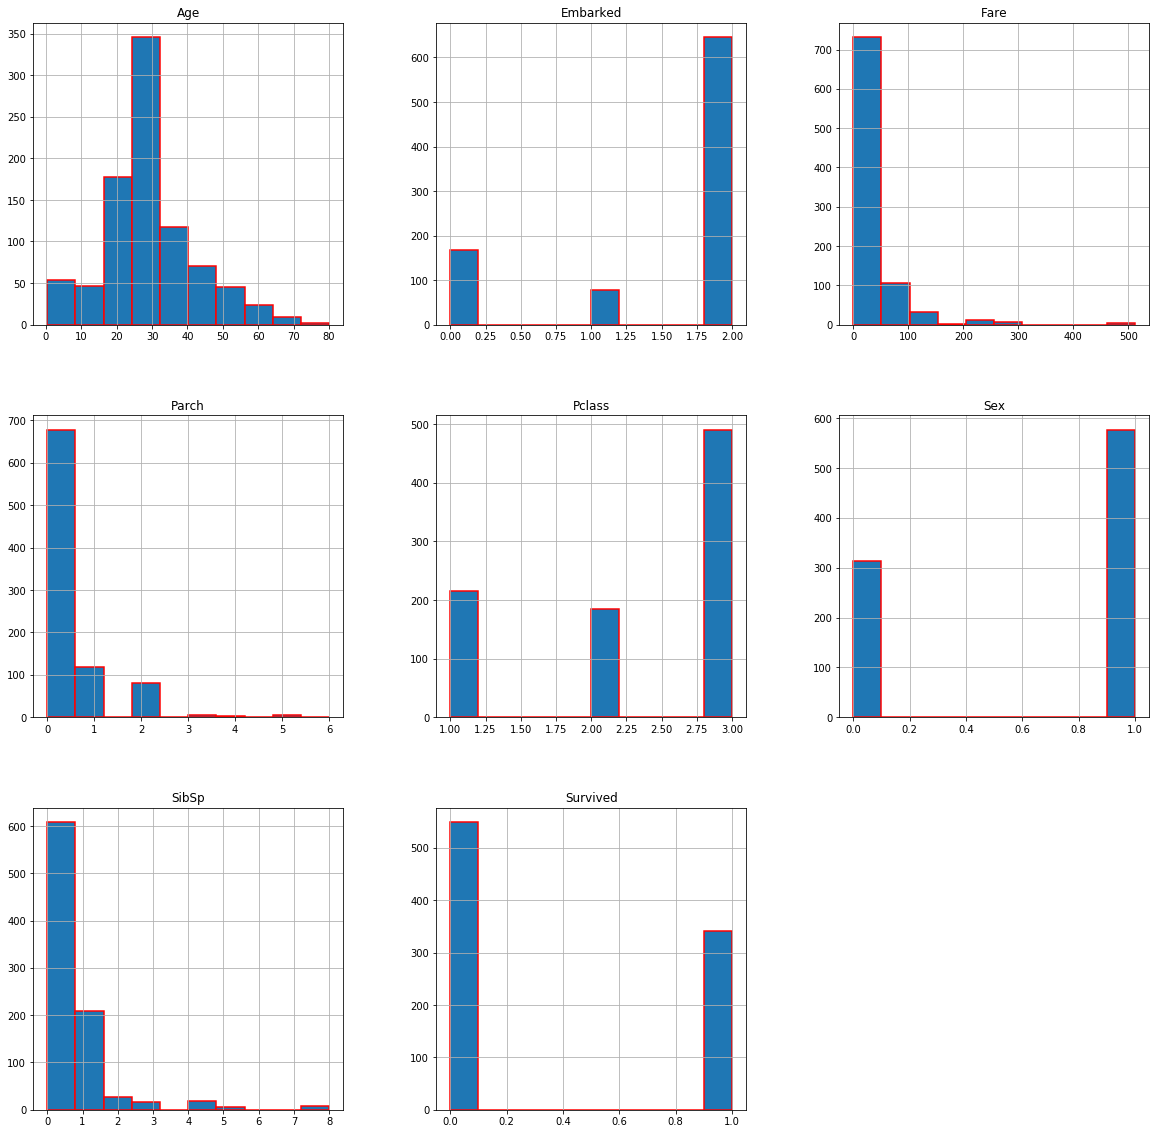

In [25]:
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

Thier are some skewsness is present in columns like SibSp,Parch,Fare,Embarked  we need to remove the skewness

Survived       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Pclass      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Sex         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp             AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch          AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare           AxesSubplot(0.529348,0.125;0.168478x0.343182)
Embarked       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

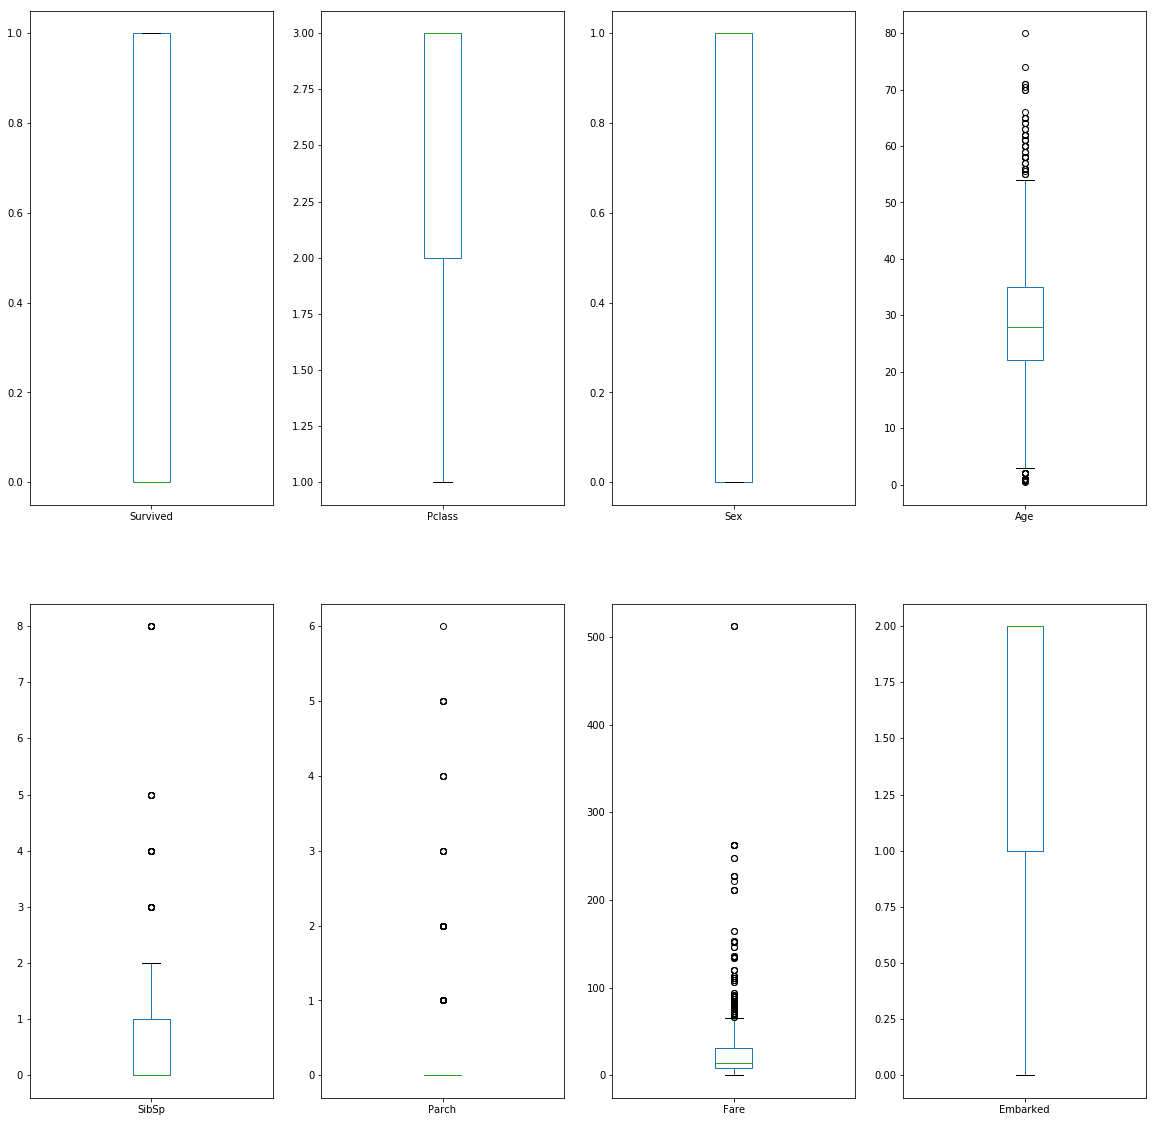

In [26]:
#checking outliers
df.plot(kind="box", subplots=True, layout=(2,4),figsize=(20,20))

Removal of outliers

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [28]:
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]
df_new.info()
percentage_ofouliers=(71/820)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 890
Data columns (total 8 columns):
Survived    820 non-null int64
Pclass      820 non-null int64
Sex         820 non-null int32
Age         820 non-null float64
SibSp       820 non-null int64
Parch       820 non-null int64
Fare        820 non-null float64
Embarked    820 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 51.2 KB
using z score percentage of outlier removed: 8.658536585365853


In [30]:
#lets check with IQR method
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
Embarked     1.0000
dtype: float64


In [31]:
df_new1=df[~((df<(Q1-1.5 *IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)
percentage_ofouliers=(314/820)*100
print(percentage_ofouliers)

(577, 8)
38.29268292682927


Using the z score method the outlier is 8.65% and using IQR method the outliers are 38.29% which is quite high, so we will use z score removl method

In [74]:
features = ["Pclass","Sex","Age", "SibSp","Parch", "Fare","Embarked"]
x=df_new[features]
y=df_new["Survived"]

In [75]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
5,3,1,28.0,0,0,8.4583,1
6,1,1,54.0,0,0,51.8625,2
7,3,1,2.0,3,1,21.0750,2
8,3,0,27.0,0,2,11.1333,2
9,2,0,14.0,1,0,30.0708,0


In [76]:
y.shape

(820,)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(y.values[Ellipsis, None])

array([[-0.8 ],
       [ 1.25],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [ 1.25],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [ 1.25],
       [-0.8 ],
       [ 1.25],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [ 1.25],
       [-0.8 ],
       [ 1.25],
       [-0.8 ],
       [-0.8 ],
       [-0.8 ],
       [ 1.25],
       [ 1.25],
       [-0.8 ],
       [

In [78]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))

skewness is removed

# Model Fitting and Predicting

In [154]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.39,random_state=48)

In [81]:
x_train.shape

(500, 7)

In [82]:
y_train.shape

(500,)

In [83]:
x_test.shape

(320, 7)

In [84]:
y_test.shape

(320,)

# SVC Model

In [92]:
svc= SVC() 
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
acc_svc = accuracy_score(y_test, pred_svc)

print(acc_svc)

0.790625


# Logistic regression

In [103]:

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
acc_logreg = accuracy_score(y_test, pred_logreg)

print(acc_logreg)

0.7875


# KNN

In [122]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn = knn.predict((x_test))
acc_knn = accuracy_score(y_test, pred_knn)

print("accuracy:",acc_knn)
print("\n")
print("confusion matrix",confusion_matrix(y_test,pred_knn ))
print("\n")
print("classificationreport", classification_report(y_test,pred_knn))

accuracy: 0.790625


confusion matrix [[164  23]
 [ 44  89]]


classificationreport               precision    recall  f1-score   support

           0       0.79      0.88      0.83       187
           1       0.79      0.67      0.73       133

   micro avg       0.79      0.79      0.79       320
   macro avg       0.79      0.77      0.78       320
weighted avg       0.79      0.79      0.79       320



# GaussianNB Model

In [123]:

gnb= GaussianNB()
gnb.fit(x_train, y_train)
pred_gnb = gnb.predict(x_test)
acc_gnb = accuracy_score(y_test, pred_gnb)

print("accuracy:",acc_gnb)
print("\n")
print("confusion matrix",confusion_matrix(y_test,pred_gnb ))
print("\n")
print("classificationreport", classification_report(y_test,pred_gnb))

accuracy: 0.765625


confusion matrix [[153  34]
 [ 41  92]]


classificationreport               precision    recall  f1-score   support

           0       0.79      0.82      0.80       187
           1       0.73      0.69      0.71       133

   micro avg       0.77      0.77      0.77       320
   macro avg       0.76      0.75      0.76       320
weighted avg       0.76      0.77      0.76       320



# DecisionTree Model

In [124]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
acc_dt = accuracy_score(y_test, pred_dt)

print("accuracy:",acc_dt)
print("\n")
print("confusion matrix",confusion_matrix(y_test,pred_dt))
print("\n")
print("classificationreport", classification_report(y_test,pred_dt))

accuracy: 0.746875


confusion matrix [[155  32]
 [ 49  84]]


classificationreport               precision    recall  f1-score   support

           0       0.76      0.83      0.79       187
           1       0.72      0.63      0.67       133

   micro avg       0.75      0.75      0.75       320
   macro avg       0.74      0.73      0.73       320
weighted avg       0.74      0.75      0.74       320



# Random forest

In [125]:

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test, pred_rf)

print("accuracy:",acc_rf)
print("\n")
print("confusion matrix",confusion_matrix(y_test,pred_rf ))
print("\n")
print("classificationreport", classification_report(y_test,pred_rf))

accuracy: 0.75625


confusion matrix [[159  28]
 [ 50  83]]


classificationreport               precision    recall  f1-score   support

           0       0.76      0.85      0.80       187
           1       0.75      0.62      0.68       133

   micro avg       0.76      0.76      0.76       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.76      0.76      0.75       320



# Evaluating Model Performances

In [131]:

model_performance = pd.DataFrame({
    "Model": ["SVC", "Logistic Regression", "K Nearest Neighbors",
               "Gaussian Naive Bayes",  
              "Decision Tree","Random Forest"],
    "Accuracy": [acc_svc,acc_logreg,  
                acc_knn, acc_gnb, acc_dt, acc_rf]
})
model_performance

,Model,Accuracy
0,SVC,0.790625
1,Logistic Regression,0.787500
2,K Nearest Neighbors,0.790625
3,Gaussian Naive Bayes,0.765625
4,Decision Tree,0.746875
5,Random Forest,0.756250


From the above accuracy score table it is found that SVC model is performing best lets tune the parameter for svc model

# Regularisation

In [159]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
                 

In [160]:
svc.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [168]:

svc = SVC()

parameters = {"kernel":["poly","rbf","linear"]
             }

grid_cv = GridSearchCV(svc, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train, y_train)

print("Our optimized svc model is:")
grid_cv.best_estimator_


Our optimized svc model is:


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [169]:

svc = grid_cv.best_estimator_

svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Saving the file

In [173]:
import pickle

In [176]:
filename="Titanic.pkl"
pickle.dump(svc,open(filename,"wb"))